In [18]:
import math

def cal_u(pi, p, q, xi):
    return pi * math.pow(p, xi) * math.pow(1 - p, 1 - xi) / \
           float(pi * math.pow(p, xi) * math.pow(1 - p, 1 - xi) +
                 (1 - pi) * math.pow(q, xi) * math.pow(1 - q, 1 - xi))

def e_step(pi,p,q,x):
    return [cal_u(pi,p,q,xi) for xi in x]

def m_step(u,x):
    pi1=sum(u)/len(u)
    p1=sum([u[i]*x[i] for i in range(len(u))]) / sum(u)
    q1=sum([(1-u[i])*x[i] for i in range(len(u))]) / sum([1-u[i] for i in range(len(u))])
    return [pi1,p1,q1]

def run(observed_x, start_pi, start_p, start_q, iter_num):
    for i in range(iter_num):
        u=e_step(start_pi, start_p, start_q, observed_x)
        print (i,[start_pi,start_p,start_q])
        if [start_pi,start_p,start_q]==m_step(u, observed_x):
            break
        else:
            [start_pi,start_p,start_q]=m_step(u, observed_x)
if __name__ =="__main__":
    # 观察数据
    x = [1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
    # 初始化 pi，p q
    [pi, p, q] = [0.4, 0.6, 0.7]
    # 迭代计算
    run(x,pi,p,q,100)


0 [0.4, 0.6, 0.7]
1 [0.40641711229946526, 0.5368421052631579, 0.6432432432432431]
2 [0.40641711229946537, 0.5368421052631579, 0.6432432432432431]
3 [0.40641711229946537, 0.536842105263158, 0.6432432432432431]


隐藏变量：
 [[0.64836239 0.09455035 0.13138257 0.12570469]
 [0.71264184 0.05252462 0.14955982 0.08527372]
 [0.66109793 0.06822542 0.16687797 0.10379868]
 ...
 [0.77094188 0.05574168 0.09068212 0.08263432]
 [0.81554596 0.04168843 0.07701134 0.06575427]
 [0.55059791 0.13836853 0.14618853 0.16484504]]
迭代次数: 1
估计的均值: [[33.23872146 23.55759486]
 [25.80017344 22.78177569]
 [33.00203754 19.7232938 ]
 [27.99160488 22.28121922]]
估计的混合项系数: [0.6706989389351405, 0.0759250287249205, 0.14671150093520272, 0.10666453140473617]
隐藏变量：
 [[3.87404672e-02 7.19239759e-01 1.52788017e-03 2.40491894e-01]
 [6.89290190e-01 9.63999219e-05 3.08832008e-01 1.78140191e-03]
 [5.60662917e-01 1.74026768e-03 4.23603272e-01 1.39935431e-02]
 ...
 [6.94238897e-01 1.71669183e-01 2.37429213e-03 1.31717628e-01]
 [9.61799850e-01 1.45110519e-02 1.49390146e-03 2.21951969e-02]
 [2.28041977e-04 9.30736850e-01 1.64466636e-05 6.90186615e-02]]
迭代次数: 2
估计的均值: [[39.62277919 25.4761933 ]
 [12.64496736 28.67794714]
 [44.09214632 12.38476937]
 

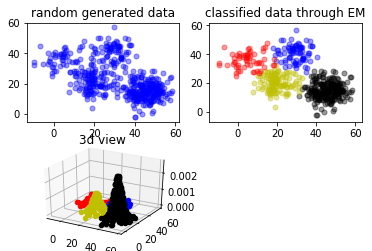

In [24]:
import math
import copy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
#生成随机数据，4个高斯模型
def generate_data(sigma,N,mu1,mu2,mu3,mu4,alpha):
    global X                  #可观测数据集
    X = np.zeros((N, 2))       # 初始化X，2行N列。2维数据，N个样本
    X=np.matrix(X)
    global mu                 #随机初始化mu1，mu2，mu3，mu4
    mu = np.random.random((4,2))
    mu=np.matrix(mu)
    global excep              #期望第i个样本属于第j个模型的概率的期望
    excep=np.zeros((N,4))
    global alpha_             #初始化混合项系数
    alpha_=[0.25,0.25,0.25,0.25]
    for i in range(N):
        if np.random.random(1) < 0.1:  # 生成0-1之间随机数
            X[i,:]  = np.random.multivariate_normal(mu1, sigma, 1)     #用第一个高斯模型生成2维数据
        elif 0.1 <= np.random.random(1) < 0.3:
            X[i,:] = np.random.multivariate_normal(mu2, sigma, 1)      #用第二个高斯模型生成2维数据
        elif 0.3 <= np.random.random(1) < 0.6:
            X[i,:] = np.random.multivariate_normal(mu3, sigma, 1)      #用第三个高斯模型生成2维数据
        else:
            X[i,:] = np.random.multivariate_normal(mu4, sigma, 1)      #用第四个高斯模型生成2维数据

#     print("可观测数据：\n",X)       #输出可观测样本
#     print("初始化的mu1，mu2，mu3，mu4：",mu)      #输出初始化的mu

def e_step(sigma,k,N):
    global X
    global mu
    global excep
    global alpha_
    for i in range(N):
        denom=0
        for j in range(0,k):
            denom += alpha_[j]*math.exp(-(X[i,:]-mu[j,:])*sigma.I*np.transpose(X[i,:]-mu[j,:]))/np.sqrt(np.linalg.det(sigma))       #分母
        for j in range(0,k):
            numer = math.exp(-(X[i,:]-mu[j,:])*sigma.I*np.transpose(X[i,:]-mu[j,:]))/np.sqrt(np.linalg.det(sigma))        #分子
            excep[i,j]=alpha_[j]*numer/denom      #求期望
    print("隐藏变量：\n",excep)

def m_step(k,N):
    global excep
    global X
    global alpha_
    for j in range(0,k):
        denom=0   #分母
        numer=0   #分子
        for i in range(N):
            numer += excep[i,j]*X[i,:]
            denom += excep[i,j]
        mu[j,:] = numer/denom    #求均值
        alpha_[j]=denom/N        #求混合项系数

if __name__ == '__main__':
    iter_num=6  #迭代次数
    N=500         #样本数目
    k=4            #高斯模型数
    probility = np.zeros(N)    #混合高斯分布
    u1=[5,35]
    u2=[30,40]
    u3=[20,20]
    u4=[45,15]
    sigma=np.matrix([[30, 0], [0, 30]])               #协方差矩阵
    alpha=[0.1,0.2,0.3,0.4]         #混合项系数
    generate_data(sigma,N,u1,u2,u3,u4,alpha)     #生成数据
    #迭代计算
    for i in range(iter_num):
        err=0     #均值误差
        err_alpha=0    #混合项系数误差
        Old_mu = copy.deepcopy(mu)
        Old_alpha = copy.deepcopy(alpha_)
        e_step(sigma,k,N)     # E步
        m_step(k,N)           # M步
        print("迭代次数:",i+1)
        print("估计的均值:",mu)
        print("估计的混合项系数:",alpha_)
        for z in range(k):
            err += (abs(Old_mu[z,0]-mu[z,0])+abs(Old_mu[z,1]-mu[z,1]))      #计算误差
            err_alpha += abs(Old_alpha[z]-alpha_[z])
        if (err<=0.001) and (err_alpha<0.001):     #达到精度退出迭代
            print(err,err_alpha)
            break
    #可视化结果
    # 画生成的原始数据
    plt.subplot(221)
    plt.scatter(X[:,0].tolist(), X[:,1].tolist(),c='b',s=25,alpha=0.4,marker='o')    #T散点颜色，s散点大小，alpha透明度，marker散点形状
    plt.title('random generated data')
    #画分类好的数据
    plt.subplot(222)
    plt.title('classified data through EM')
    order=np.zeros(N)
    color=['b','r','k','y']
    for i in range(N):
        for j in range(k):
            if excep[i,j]==max(excep[i,:]):
                order[i]=j     #选出X[i,:]属于第几个高斯模型
            probility[i] += alpha_[int(order[i])]*math.exp(-(X[i,:]-mu[j,:])*sigma.I*np.transpose(X[i,:]-mu[j,:]))/(np.sqrt(np.linalg.det(sigma))*2*np.pi)    #计算混合高斯分布
        plt.scatter(X[i, 0], X[i, 1], c=color[int(order[i])], s=25, alpha=0.4, marker='o')      #绘制分类后的散点图
    #绘制三维图像
    ax = plt.subplot(223, projection='3d')
    plt.title('3d view')
    for i in range(N):
        ax.scatter(X[i, 0], X[i, 1], probility[i], c=color[int(order[i])])
    plt.show()


In [36]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

## 数据加载
data = pd.read_csv('datas/HeightWeight.csv')
data_x = data[data.columns[1:]]
data_y = data[data.columns[0]]
data.head()

## 模型创建及训练
gmm = GaussianMixture(n_components=2)
gmm.fit(data_x)

## 模型相关参数输出
# print ('均值 = \n', gmm.means_)
# print ('方差 = \n', gmm.covariances_)

# 获取预测值
y_hat = gmm.predict(data_x)
print(y_hat)
print(data_y.values.T)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=2).fit(data_x)
print(model.predict(data_x))
model.predict()

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1
 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0
 0 1 0]
